<a href="https://colab.research.google.com/github/DaisyXinyiHe/stock_prediction/blob/main/market_pred_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Mount drive from google drive if needed
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/stock_prediction

/content/drive/MyDrive/Colab Notebooks/stock_prediction


In [ ]:
!pip install pykalman

     |████████████████████████████████| 228 kB 5.3 MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48461 sha256=bdc90751f97bbae4e5ab8c87cf5a14668f1f3c1811950866bbe14c641f141e25
  Stored in directory: /root/.cache/pip/wheels/6a/04/02/2dda6ea59c66d9e685affc8af3a31ad3a5d87b7311689efce6
Successfully built pykalman


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Stocks

dataset: https://www.kaggle.com/aaron7sun/stocknews

In [ ]:
stocks = pd.read_csv('./archive/upload_DJIA_table.csv')

In [ ]:
from datetime import datetime
stocks['Date'] = stocks.apply(lambda x:datetime.strptime(x['Date'], '%Y-%m-%d'),axis = 1)

In [ ]:
max(stocks.Date), min(stocks.Date)

(Timestamp('2016-07-01 00:00:00'), Timestamp('2008-08-08 00:00:00'))

In [ ]:
# news = pd.read_csv('./archive/RedditNews.csv')
# news['Date'] = news.apply(lambda x:datetime.strptime(x['Date'], '%Y-%m-%d'),axis = 1)
# max(news.Date), min(news.Date)

In [ ]:
stocks.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [ ]:
stocks

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


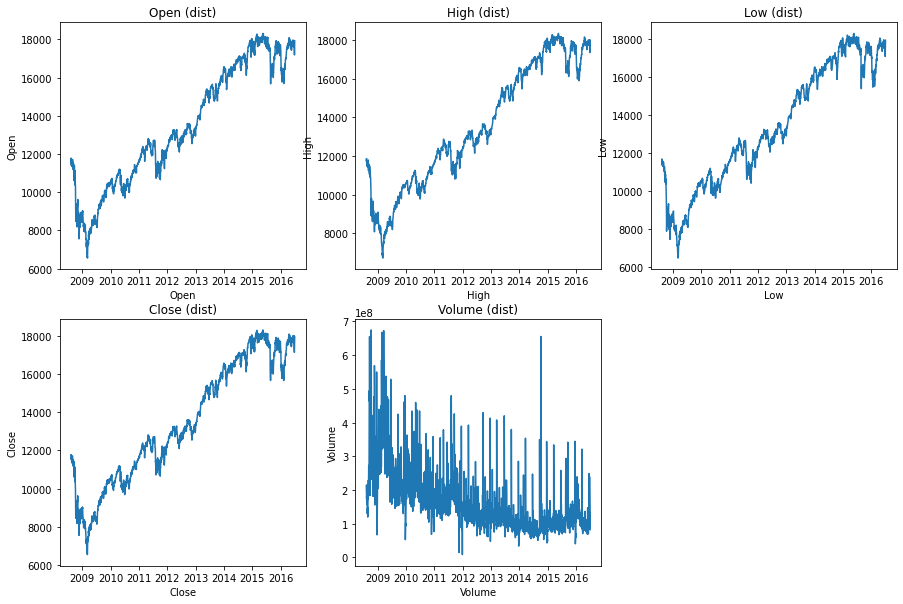

In [ ]:

#  plot Numerical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))

for i in stocks.iloc[:,1:6]:
    plt.subplot(a, b, c)
    plt.title('{} (dist)'.format(i))
    plt.xlabel(i)
    sns.lineplot(data=stocks, x="Date", y=i)
    c = c + 1


In [ ]:
stocks['return'] = stocks['Close'] - stocks['Open']
stocks['best_return'] = stocks['High'] - stocks['Low']

In [ ]:
stocks = stocks.sort_values(by=['Date'])

In [ ]:
price_change_percentage = 100 *stocks.Close.pct_change()#.dropna()
stocks['price_change'] = price_change_percentage
price_change_percentage = price_change_percentage.dropna()
len(price_change_percentage)

1988

In [ ]:
def mean_impl(x, nlags):

    ## Pointers to track series chuckage
    head_series = 0
    end_series = len(x)
    
    result_x1 = []
    result_x2 = []

    ## Loop through nlags
    for n in range(nlags+1):

      ## Split x array into time series chunks with n lags
      x1 = x[0:end_series:1]
      x2 = x[head_series::1]

      ## Calculate mean
      mean_x1 = np.mean(x1)
      mean_x2 = np.mean(x2)
      
      ## Correlation
      result_x1.append(mean_x1)
      result_x2.append(mean_x2)
      
      ## End pointers -1 to decrease x1 chunk
      ## Head points +1 to forward x2 chunk
      end_series -=1
      head_series+=1
    return result_x1, result_x2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

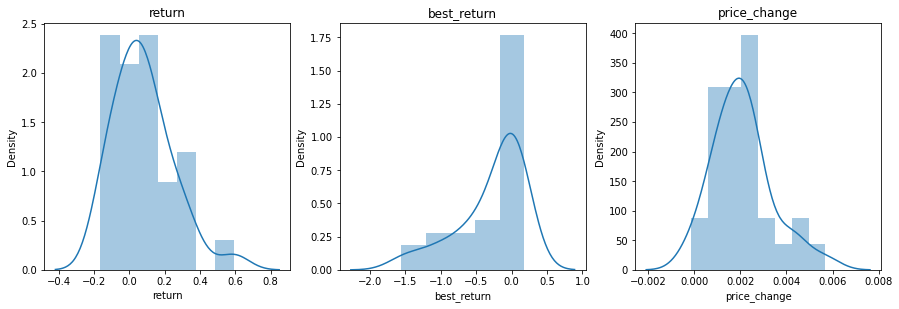

In [ ]:
nlags = 30

# x = stocks['Close'] 
# result_x1, result_x2 = mean_impl(x, nlags)
# diff_mean = [x2 - x1 for x2, x1 in zip(result_x2, result_x1)]
# plt.figure()
# # plt.plot(result_x1)
# # plt.plot(result_x2)
# sns.distplot(diff_mean)
# plt.title('stocks return')
# plt.show()

x = stocks['return'] 
result_x1, result_x2 = mean_impl(x, nlags)
diff_mean_return = [x2 - x1 for x2, x1 in zip(result_x2, result_x1)]
# plt.figure()
# # plt.plot(result_x1)
# # plt.plot(result_x2)
# sns.distplot(diff_mean)
# plt.title('stocks return')
# plt.show()

x = stocks['best_return'] 
result_x1, result_x2 = mean_impl(x, nlags)
diff_mean_bestreturn = [x2 - x1 for x2, x1 in zip(result_x2, result_x1)]
# plt.figure()
# # plt.plot(result_x1)
# # plt.plot(result_x2)
# # sns.distplot(result_x1)
# # sns.distplot(result_x2)
# sns.distplot(diff_mean)
# plt.title('stocks best return')
# plt.show()

x = price_change_percentage 
result_x1, result_x2 = mean_impl(x, nlags)
diff_mean_pricechange = [x2 - x1 for x2, x1 in zip(result_x2, result_x1)]
# plt.figure()
# # plt.plot(result_x1)
# # plt.plot(result_x2)
# # sns.distplot(result_x1)
# # sns.distplot(result_x2)
# sns.distplot(diff_mean)
# plt.title('price change percentage')
# plt.show()

X = {'return':diff_mean_return , 'best_return':diff_mean_bestreturn, 'price_change':diff_mean_pricechange}

a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))

for i in X.keys():
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.distplot(X[i])
    c = c + 1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


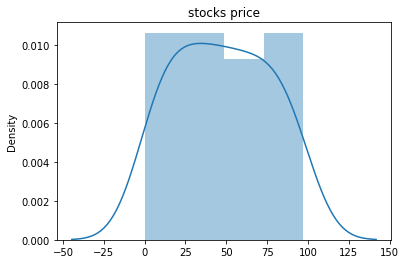

In [ ]:
nlags = 30

x = stocks['Close'] 
result_x1, result_x2 = mean_impl(x, nlags)
diff_mean = [x2 - x1 for x2, x1 in zip(result_x2, result_x1)]
plt.figure()
# plt.plot(result_x1)
# plt.plot(result_x2)
sns.distplot(diff_mean)
plt.title('stocks price')
plt.show()

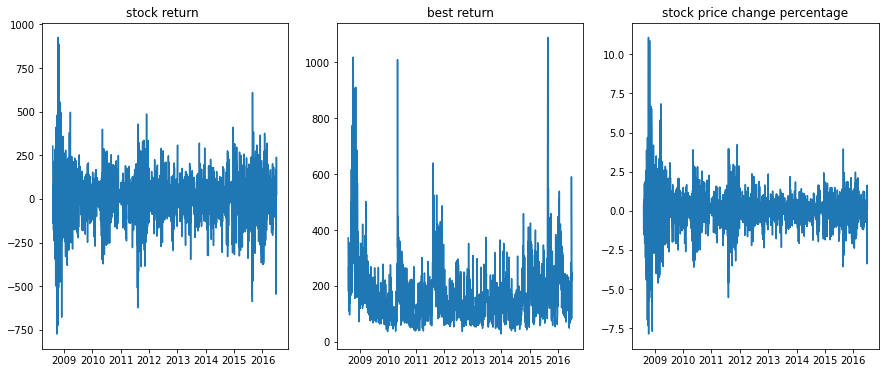

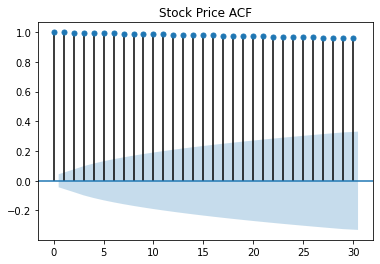

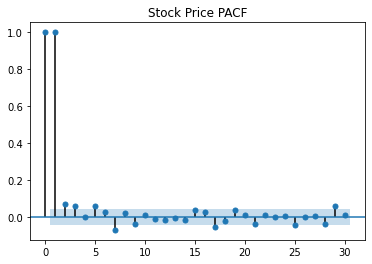

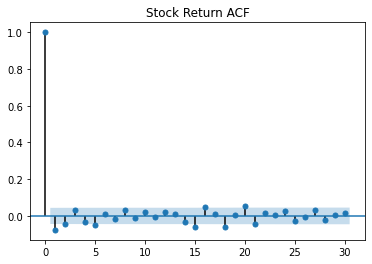

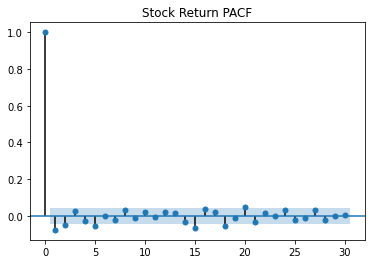

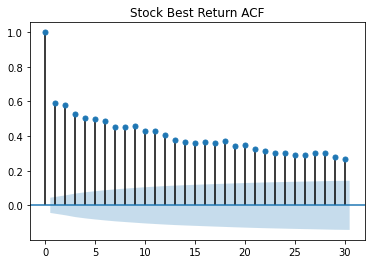

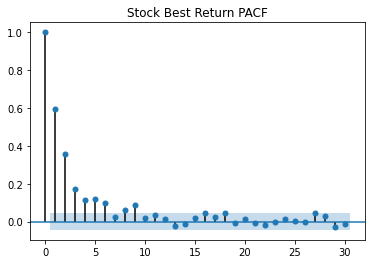

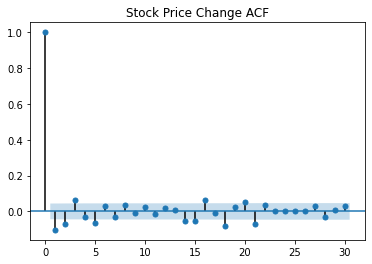

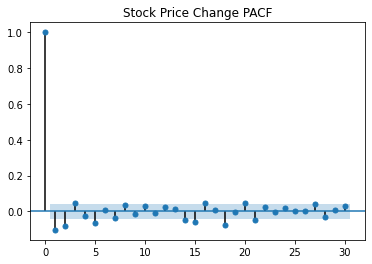

In [ ]:
fig,axs = plt.subplots(1,3,figsize = (15,6))
## Plot of return
# plt.figure(figsize=(10,6))
# plt.plot(stocks['Date'],stocks['return'], label = 'DJIA_return')
axs[0].plot(stocks['Date'],stocks['return'], label = 'DJIA_return')
# plt.plot(stocks['Date'],stocks['best_return'], label = 'DJIA_best_return')
# plt.legend(loc="upper left")
# plt.title(f"Stock return of DJIA")
# plt.show()
axs[0].title.set_text("stock return ")

## Plot of best return
# plt.figure(figsize=(10,6))
# plt.plot(stocks['Date'],stocks['best_return'], label = 'DJIA_best_return')
# plt.legend(loc="upper left")
# plt.title(f"Best return of DJIA")
# plt.show()
axs[1].plot(stocks['Date'],stocks['best_return'], label = 'DJIA_best_return')
axs[1].title.set_text('best return')
# plt.show()

axs[2].plot(stocks['Date'].iloc[1:],price_change_percentage, label = 'DJIA_price_change_percentage')
axs[2].title.set_text('stock price change percentage')
plt.show()


## Stock price
# plot acf
plot_acf(x=stocks.Close, lags=30, title=f"Stock Price ACF")
plt.show()
# Plot pcaf
plot_pacf(x=stocks.Close, lags=30, title=f"Stock Price PACF")
plt.show()

## Stock return
# plot acf
plot_acf(x=stocks['return'], lags=30, title=f"Stock Return ACF")
plt.show()
# Plot pcaf
plot_pacf(x=stocks['return'], lags=30, title=f"Stock Return PACF")
plt.show()

## Stock best return
# plot acf
plot_acf(x=stocks['best_return'], lags=30, title=f"Stock Best Return ACF")
plt.show()
# Plot pcaf
plot_pacf(x=stocks['best_return'], lags=30, title=f"Stock Best Return PACF")
plt.show()

## Stock price change
# plot acf
plot_acf(x=price_change_percentage, lags=30, title=f"Stock Price Change ACF")
plt.show()
# Plot pcaf
plot_pacf(x=price_change_percentage, lags=30, title=f"Stock Price Change PACF")
plt.show()





In [ ]:
def calculate_RMSE(y_pred, y_true):
  return np.sqrt(np.nanmean([(y_true - y_pred)**2]))

In [ ]:
## Split into train and test
train =  stocks.iloc[1:int(0.8*len(stocks))+1,:]
test = stocks.iloc[int(0.8*len(stocks))+1:,:]

## ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA Model
ARIMA_model = ARIMA(train['price_change'].values, order=(0,0,1))
ARIMA_model_fit = ARIMA_model.fit(disp=0)
print(ARIMA_model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1591
Model:                     ARMA(0, 1)   Log Likelihood               -2695.929
Method:                       css-mle   S.D. of innovations              1.317
Date:                Mon, 20 Dec 2021   AIC                           5397.859
Time:                        01:51:12   BIC                           5413.975
Sample:                             0   HQIC                          5403.845
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0354      0.029      1.236      0.217      -0.021       0.091
ma.L1.y       -0.1338      0.026     -5.130      0.000      -0.185      -0.083
                                    Roots           

In [ ]:
len(test.index)

397

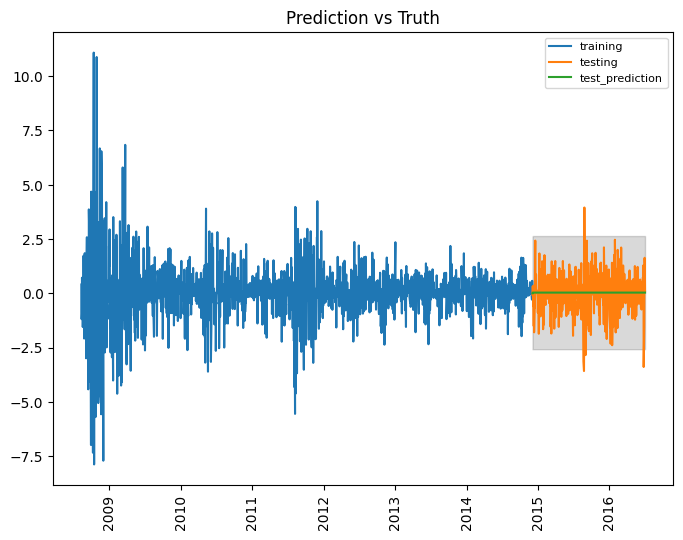

In [ ]:
fc, se, conf = ARIMA_model_fit.forecast(steps = len(test.index), alpha=0.05)
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16) 
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(8,6), dpi=100)
plt.plot(train['Date'], train['price_change'], label='training')
plt.plot(test['Date'], test['price_change'], label='testing')
plt.plot(test['Date'], fc_series, label='test_prediction')
plt.fill_between(test['Date'], lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Prediction vs Truth')
plt.legend(loc='upper right', fontsize=8)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ig

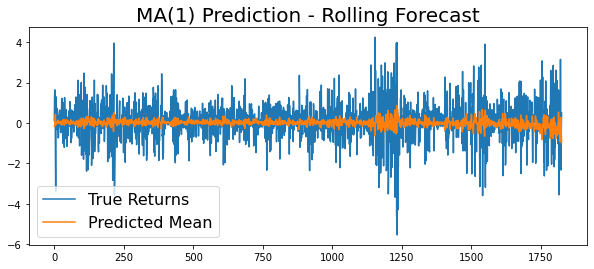

In [ ]:
rolling_predictions = []
test_size = 365*5
for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = ARIMA(train, order=(0,0,1)).fit(disp = 0)

    fc, se, conf = model.forecast(len(train))
    rolling_predictions.append(fc)
rolling_predictions_ma = pd.Series([r[0] for r in rolling_predictions], index=returns.index[-test_size:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions_ma)
plt.title('MA(1) Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Mean'], fontsize=10, loc = 2)

In [ ]:
arima_rmse = calculate_RMSE(rolling_predictions_ma, test['price_change'])
arima_rmse

0.9775769566899895

# GARCH

In [ ]:
!pip install arch

     |████████████████████████████████| 902 kB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 26.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
returns = 100 *stocks.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

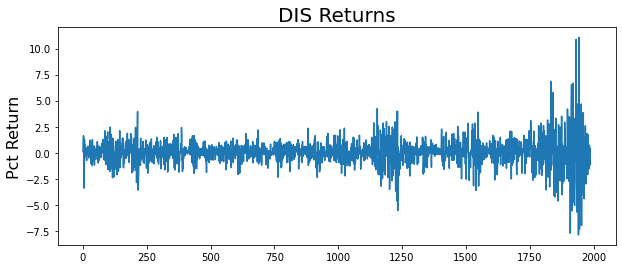

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

In [ ]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model

n_test = int(0.8*len(stocks))
train, test = stocks[:n_test], stocks[n_test:]
# define model
# model = arch_model(train['return'], mean='Zero', vol='GARCH', p=20, q=20)

am = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
# fit model
# model_fit = model.fit()
# split_date = datetime(2010,1,1)
# res = am.fit(last_obs=1000)
# forecast the test set
# yhat = model_fit.forecast(horizon=n_test)
# forecasts = res.forecast(horizon=5, start=1001)
# forecasts.variance[1001:].plot()
# plot the actual variance
# var = [i*0.01 for i in range(0,100)]
# pyplot.plot(var[n_test:])
# # plot forecast variance
# pyplot.plot(yhat.variance.values[-1, :])
# pyplot.show()

In [ ]:
model = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
model_fit = model.fit()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2705.8997841676405
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2701.909362198144
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2701.8864218140707
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2699.2759009692572
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2698.7214482906074
Iteration:      6,   Func. Count:     49,   Neg. LLF: 2698.109151167819
Iteration:      7,   Func. Count:     56,   Neg. LLF: 2697.3851217882193
Iteration:      8,   Func. Count:     63,   Neg. LLF: 2697.2468602400368
Iteration:      9,   Func. Count:     70,   Neg. LLF: 2697.1735906568993
Iteration:     10,   Func. Count:     76,   Neg. LLF: 2697.165863237238
Iteration:     11,   Func. Count:     82,   Neg. LLF: 2697.165627126136
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2697.165627127091
            Iterations: 11
            Function evaluations: 82
            Gradient evaluat

In [ ]:
model_fit

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2695.87
Distribution:                  Normal   AIC:                           5399.73
Method:            Maximum Likelihood   BIC:                           5422.11
                                        No. Observations:                 1987
Date:                Mon, Dec 20 2021   Df Residuals:                     1986
Time:                        02:29:04   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0667  1.747e-02      3.818  1.346e-04 [3.246e-0

In [ ]:
  len(returns)

1988

In [ ]:
len(returns)/365

5.446575342465754

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex

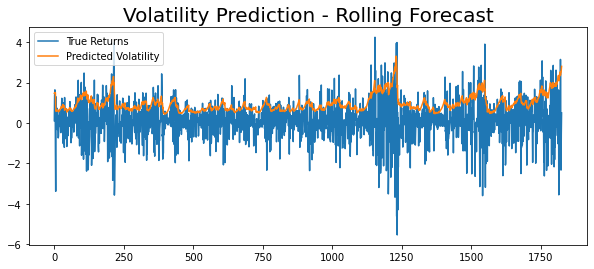

In [ ]:
rolling_predictions = []
test_size = 365*5


for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions_garch = pd.Series(rolling_predictions, index=returns.index[-test_size:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions_garch)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=10, loc = 2)

In [ ]:
garch_rmse = calculate_RMSE(rolling_predictions_garch, test['price_change'])
garch_rmse

1.3599354152553036

# Combine MA(1) and GARCH

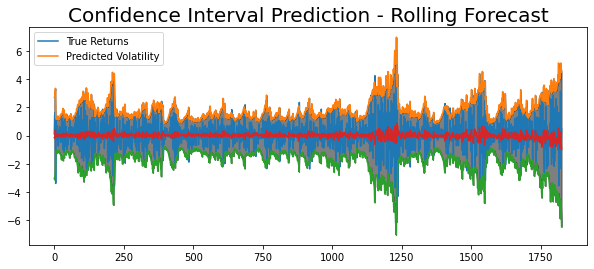

In [ ]:
test_size = 365*5
upper = [mean+1.96*sd for mean, sd in zip(rolling_predictions_ma, rolling_predictions_garch)]
lower = [mean-1.96*sd for mean, sd in zip(rolling_predictions_ma, rolling_predictions_garch)]
upper = pd.Series(upper, index=returns.index[-test_size:])
lower = pd.Series(lower, index=returns.index[-test_size:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds_upper, = plt.plot(upper)
preds_lower, = plt.plot(lower)
preds_mean, = plt.plot(rolling_predictions_ma)
plt.fill_between(returns.index[-test_size:], lower, upper, color='k', alpha=0.5)

plt.title('Confidence Interval Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=10, loc = 2)
plt.show()

### Kalman w EM

In [ ]:
from pykalman import KalmanFilter

In [ ]:
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

In [ ]:
y_test_pred, y_test_covar = kf.em(train['price_change']).smooth(test['price_change'])

In [ ]:
y_train_pred,_=kf.smooth(train['price_change'])

In [ ]:
y_test_sd = np.sqrt(y_test_covar)

In [ ]:
y_test_se = y_test_sd / np.sqrt(len(test))

In [ ]:
upper = [pred+1.96*se for pred, se in zip(y_test_pred, np.squeeze(y_test_se))]
lower = [pred-1.96*se for pred, se in zip(y_test_pred, np.squeeze(y_test_se))]


In [ ]:
lower = pd.Series(np.squeeze(lower), index=test.index)
upper = pd.Series(np.squeeze(upper), index=test.index)

In [ ]:
test['price_change_pred'] = y_test_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


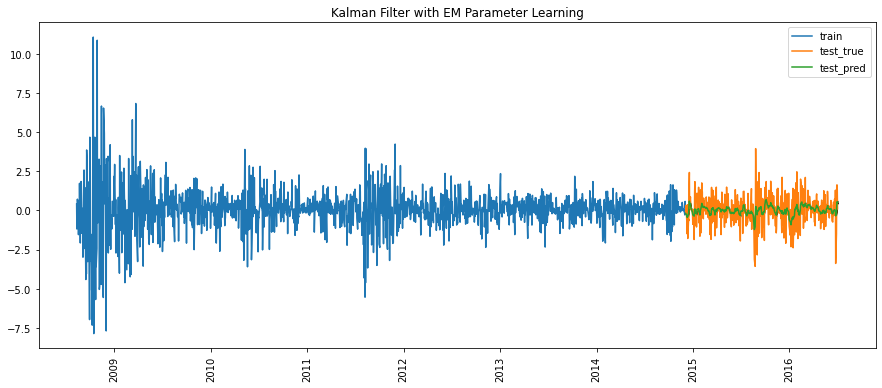

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
line_train,  = ax.plot(train['Date'], train['price_change'])
# line_train_pred,  = ax.plot(train['Date'], y_train_pred)
# line_true,  = ax.plot(test['Date'], test['price_change'])
# line_pred, = ax.plot(test['Date'], test['price_change_pred'])
ax.plot(test['Date'], test['price_change'])
ax.plot(test['Date'], test['price_change_pred'])

ax.legend([line_train, line_true,line_pred],['train','test_true','test_pred'])


# ax.fill_between(test['Date'], lower, upper, color='k', alpha=1)


ax.title.set_text('Kalman Filter with EM Parameter Learning')
plt.xticks(rotation = 90)
plt.show()



In [ ]:
kalman_rmse = calculate_RMSE(np.array(y_test_pred).squeeze(), test['price_change'])
kalman_rmse

0.834002090221028

### LSTM

In [ ]:
import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader
# from sklearn.model_selection import train_test_split

In [ ]:
def min_max_norm(prices):
  price = (prices-min(prices)) / (max(prices)-min(prices))
  return price

def mean_norm(prices):
  price = (prices-np.mean(prices)) / np.sqrt(np.var(prices))
  return price

In [ ]:
## Split into train and test
train =  stocks.iloc[1:int(0.6*len(stocks)),:]
val =  stocks.iloc[int(0.6*len(stocks)):int(0.8*len(stocks)),:]
test = stocks.iloc[int(0.8*len(stocks)):,:]
train['Date'] = train['Date'].apply(datetime.timestamp)
val['Date'] = val['Date'].apply(datetime.timestamp)
test['Date'] = test['Date'].apply(datetime.timestamp)

## Normalize Data
train['Volume_stan'] = min_max_norm(train['Volume'])
val['Volume_stan'] = min_max_norm(val['Volume'])
test['Volume_stan'] = min_max_norm(test['Volume'])
train['Date_stan'] = min_max_norm(train['Date'])
val['Date_stan'] = min_max_norm(val['Date'])
test['Date_stan'] = min_max_norm(test['Date'])
train['return_stan'] = min_max_norm(train['return'])
val['return_stan'] = min_max_norm(val['return'])
test['return_stan'] = min_max_norm(test['return'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
# X_train, y_train = train[['Date_stan', 'Volume_stan']], train['price_change']
# X_val, y_val = val[['Date_stan', 'Volume_stan']], val['price_change']
# X_test, y_test = test[['Date_stan', 'Volume_stan']], test['price_change']

X_train, y_train = train[['Date_stan']], train['price_change']
X_val, y_val = val[['Date_stan']], val['price_change']
X_test, y_test = test[['Date_stan']], test['price_change']

# X_train, y_train = train.index, train['price_change']
# X_val, y_val = val.index, val['price_change']
# X_test, y_test = test.index, test['price_change']

In [ ]:
def dat_to_tensor(data):
  data = torch.Tensor(np.array(data))
  return data

In [ ]:
X_train = dat_to_tensor(X_train)
y_train = dat_to_tensor(y_train)
X_val = dat_to_tensor(X_val)
y_val = dat_to_tensor(y_val)
X_test = dat_to_tensor(X_test)
y_test = dat_to_tensor(y_test)

In [ ]:
batch_size = 100
train_set = TensorDataset(X_train, y_train)
val_set = TensorDataset(X_val, y_val)
test_set = TensorDataset(X_test,y_test)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader_one = DataLoader(val_set, batch_size=1, shuffle=False, drop_last=True)
test_loader_one = DataLoader(test_set, batch_size=1, shuffle=False, drop_last=True)


In [ ]:
features, labels = next(iter(val_loader_one))
print(f"Feature batch shape: {features.size()}")
print(f"Labels batch shape: {labels.size()}")

Feature batch shape: torch.Size([1, 1])
Labels batch shape: torch.Size([1])


In [ ]:

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(LSTM, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)




    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

In [ ]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(GRU, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.layer_dim = layer_dim
        self.hidden_dim = hidden_dim

        # GRU layers
        self.gru = nn.GRU(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, _ = self.gru(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out


In [ ]:
class Optimization:
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
    
    def train_step(self, x, y):
        # Sets model to train mode
        self.model.train()

        # Makes predictions
        yhat = self.model(x)

        # Computes loss
        loss = self.loss_fn(y, yhat)

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()
    def train(self, train_loader, val_loader, batch_size=64, n_epochs=50, n_features=1):
      for epoch in range(1, n_epochs + 1):
        batch_losses = []
        for x_batch, y_batch in train_loader:
            x_batch = x_batch.view([batch_size, -1, n_features])
            y_batch = y_batch
            loss = self.train_step(x_batch, y_batch)
            batch_losses.append(loss)
        training_loss = np.mean(batch_losses)
        self.train_losses.append(training_loss)

        with torch.no_grad():
            batch_val_losses = []
            for x_val, y_val in val_loader:
                x_val = x_val.view([batch_size, -1, n_features])
                y_val = y_val
                self.model.eval()
                yhat = self.model(x_val)
                val_loss = self.loss_fn(y_val, yhat).item()
                batch_val_losses.append(val_loss)
            validation_loss = np.mean(batch_val_losses)
            self.val_losses.append(validation_loss)
        
        print(f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}")

        # if (epoch <= 10) | (epoch % n_epochs == 0):
        #     print(
        #         f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
        #     )

    def evaluate(self, test_loader, batch_size=1, n_features=1):
      with torch.no_grad():
          predictions = []
          values = []
          for x_test, y_test in test_loader:
              x_test = x_test.view([batch_size, -1, n_features])
              y_test = y_test
              self.model.eval()
              yhat = self.model(x_test)
              predictions.append(yhat.detach().numpy())
              values.append(y_test.detach().numpy())

      return predictions, values
   
    def plot_losses(self):
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close() 

In [ ]:
def get_model(model, model_params):
    models = {
        "lstm": LSTM,
        "gru": GRU,
    }
    return models.get(model.lower())(**model_params)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1/50] Training loss: 2.3680	 Validation loss: 0.4139
[2/50] Training loss: 2.3665	 Validation loss: 0.4134
[3/50] Training loss: 2.3619	 Validation loss: 0.4135
[4/50] Training loss: 2.3609	 Validation loss: 0.4133
[5/50] Training loss: 2.3604	 Validation loss: 0.4130
[6/50] Training loss: 2.3605	 Validation loss: 0.4131
[7/50] Training loss: 2.3604	 Validation loss: 0.4131
[8/50] Training loss: 2.3603	 Validation loss: 0.4130
[9/50] Training loss: 2.3603	 Validation loss: 0.4130
[10/50] Training loss: 2.3603	 Validation loss: 0.4130
[11/50] Training loss: 2.3602	 Validation loss: 0.4131
[12/50] Training loss: 2.3602	 Validation loss: 0.4131
[13/50] Training loss: 2.3601	 Validation loss: 0.4131
[14/50] Training loss: 2.3600	 Validation loss: 0.4132
[15/50] Training loss: 2.3600	 Validation loss: 0.4132
[16/50] Training loss: 2.3599	 Validation loss: 0.4132
[17/50] Training loss: 2.3599	 Validation loss: 0.4133
[18/50] Training loss: 2.3598	 Validation loss: 0.4133
[19/50] Training lo

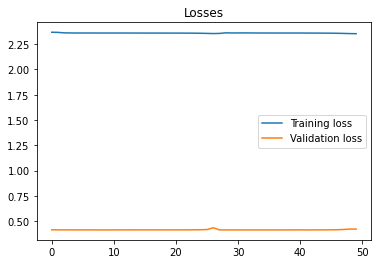

In [ ]:
import torch.optim as optim

input_dim = 1
output_dim = 1
hidden_dim = 200
layer_dim = 2
batch_size = 100
dropout = 0
n_epochs = 50
learning_rate = 0.01
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('lstm', model_params)
# model = get_model('gru', model_params)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size,  n_features=input_dim, n_epochs=n_epochs)

opt.plot_losses()





In [ ]:
val_predictions, val_values = opt.evaluate(val_loader_one, batch_size=1, n_features=input_dim)
predictions, values = opt.evaluate(test_loader_one, batch_size=1, n_features=input_dim)
# predictions, values = opt.evaluate(test_loader_one, batch_size=1, n_features=input_dim)

RuntimeError: ignored

In [ ]:
len(X_test),len(predictions)

NameError: ignored

In [ ]:

def format_predictions(predictions, values, df_test, scaler=None):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"time": X_test, "truth": vals, "prediction": preds})
    # df_result = df_result.sort_index()
    # df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result


df_result = format_predictions(predictions, values, X_test)
val_result = format_predictions(val_predictions, val_values, X_val)

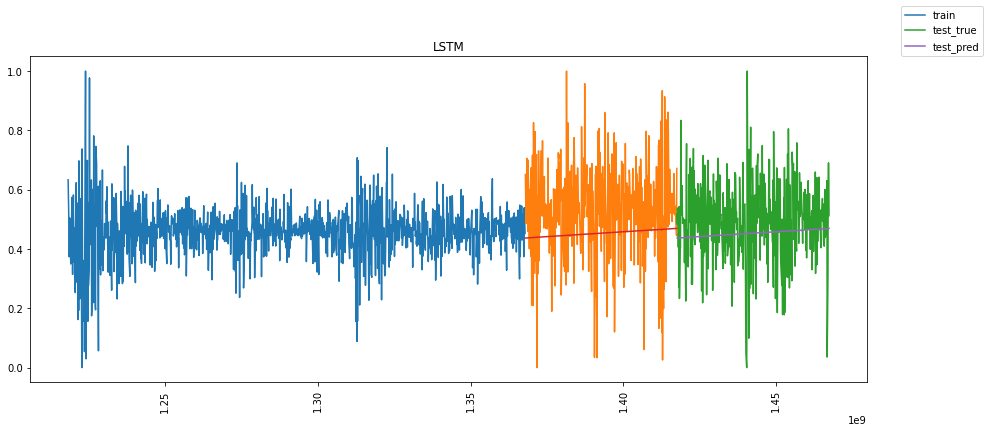

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
line_train,  = ax.plot(train['Date'], train['return_stan'])
# line_train_pred,  = ax.plot(train_dat['local_datetime'], y_train_pred)
line_true,  = ax.plot(val['Date'], val['return_stan'])
line_true,  = ax.plot(test['Date'], test['return_stan'])
line_pred, = ax.plot(val['Date'], val_result['prediction'])
line_pred, = ax.plot(test['Date'], df_result['prediction'])
ax.legend([line_train, line_true,line_pred],['train','test_true','test_pred'], loc = (1.04,1))
plt.title('LSTM')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
rnn_rmse = calculate_RMSE(df_result['prediction'].values, test['return'])
rnn_rmse

159.78825807136965

### HMM

In [ ]:
!pip install hmmlearn

In [ ]:
from hmmlearn import hmm

In [ ]:
## Split into train and test
train =  stocks[['Date', 'price_change']].iloc[1:int(0.8*len(stocks))+1,:]
test = stocks[['Date', 'price_change']].iloc[int(0.8*len(stocks))+1:,:]

In [ ]:
train['Date'] = train['Date'].apply(datetime.timestamp)
test['Date'] = test['Date'].apply(datetime.timestamp)

In [ ]:
train

,Date,price_change
1987,1.218413e+09,0.409306
1986,1.218499e+09,-1.187199
1985,1.218586e+09,-0.940606
1984,1.218672e+09,0.719414
1983,1.218758e+09,0.378538
...,...,...
401,1.416960e+09,0.071909
400,1.417133e+09,0.002750
399,1.417392e+09,-0.288528
398,1.417478e+09,0.578001


In [ ]:
K = 3
model = hmm.GaussianHMM(n_components=K, n_iter = 100)

## Randomly guess initial state
model.startprob_ = np.array([1.0, 0.0, 0.0])
model.fit(train['price_change'].values.reshape(-1, 1))
# model.fit(train)


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'


GaussianHMM(n_components=3, n_iter=100)

In [ ]:
## Predict
from sklearn.utils import check_random_state

n_pred = len(test)
prediction = []
states = model.predict(test)
transmat_cdf = np.cumsum(model.transmat_, axis=1)
random_state = check_random_state(model.random_state)

for i in np.arange(n_pred):
    next_state = (transmat_cdf[states[-1]] > random_state.rand()).argmax()
    next_obs = model._generate_sample_from_state(next_state, random_state)

    states = np.append(states, next_state)
    prediction.append(next_obs)

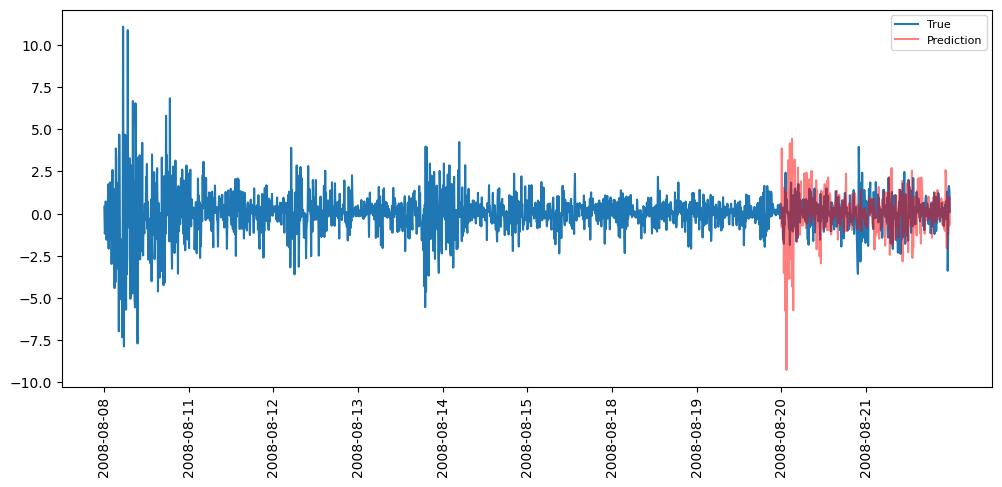

In [ ]:
# Plot results -- 
plt.figure(figsize=(12,5), dpi=100)
plt.plot(np.arange(len(stocks)), stocks['price_change'], label = "True")
plt.plot(np.arange(len(train)+1, len(train)+1+len(test)), prediction, c = "red", label = "Prediction", alpha = 0.5)
plt.xticks(np.arange(len(stocks), step = 199), stocks['Date'].apply(datetime.date), rotation = 90)
plt.legend(loc='upper right', fontsize=8)

In [ ]:
hmm_rmse = calculate_RMSE(np.array(prediction).squeeze(), test['price_change'])
hmm_rmse

1.6028304573971501

# LM, Random Forest, and LSTM with multiple variables:
* volume
* sentiment

# Draft

In [ ]:
news['News'].loc[(news['sentiment'] == 'POSITIVE')&(news['Date'] == date_sentiment.index[0])]

In [ ]:
# # all_tweets['tweet'].loc[7843][0:80]
news['News'].loc[73586]

In [ ]:
plt.figure(figsize = (10,8))
# plt.plot(date_sentiment.index, date_sentiment.values)
plt.plot(date_sentiment.index[0:80], date_sentiment.values[0:80])
plt.xticks(rotation = 300)


textstr1 = '\n'.join((
    r'positive:'+news['News'].loc[][0:80]+'...',
    r'negative:'+news['News'].loc[73586][0:80]+'...'))
# textstr2 = '\n'.join((
#     r'positive:'+all_tweets['tweet'].loc[7569][0:80]+'...',
#     r'negative:'+all_tweets['tweet'].loc[7717][0:80]+'...'))
# textstr3 = '\n'.join((
#     r'positive:'+all_tweets['tweet'].loc[7247][0:80]+'...',
#     r'negative:'+all_tweets['tweet'].loc[7443][0:80]+'...'))
# textstr4 = '\n'.join((
#     r'positive:'+all_tweets['tweet'].loc[5859][0:80]+'...',
#     r'negative:'+all_tweets['tweet'].loc[5517][0:80]+'...'))

plt.text(x = news['Date'].loc[73586], y=date_sentiment.loc[news['Date'].loc[73586]]+0.01, s = textstr1, bbox=dict(facecolor='white', alpha=0.5), fontsize = 10)
# plt.text(x = all_tweets['date'].loc[7569], y=date_sentiment.loc[all_tweets['date'].loc[7569]]+0.01, s = textstr_12_04, bbox=dict(facecolor='white', alpha=0.5), fontsize = 10)
# plt.text(x = all_tweets['date'].loc[7452], y=date_sentiment.loc[all_tweets['date'].loc[7452]]+0.01, s = textstr_12_05, bbox=dict(facecolor='white', alpha=0.5), fontsize = 10)
# plt.text(x = all_tweets['date'].loc[5859], y=date_sentiment.loc[all_tweets['date'].loc[5859]]+0.01, s = textstr_12_06, bbox=dict(facecolor='white', alpha=0.5), fontsize = 10)
# plt.text(x = all_tweets['date'].loc[4417], y=date_sentiment.loc[all_tweets['date'].loc[4417]]+0.03, s = textstr_12_07, bbox=dict(facecolor='white', alpha=0.5), fontsize = 10)
# plt.text(x = all_tweets['date'].loc[8459], y=date_sentiment.loc[all_tweets['date'].loc[8459]]+0.01, s = textstr_12_08, bbox=dict(facecolor='white', alpha=0.5), fontsize = 10)



plt.xlabel('Date', fontsize = 16)
plt.ylabel('Sentiment', fontsize = 16)
# plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()